#Padrões de deslocamento e de Horários de aula de 50 alunos numa escola
#O código simula um dataset de alunos com as features mencionadas acima. Utilizando o K-Means do sklearn, padrões são
#identificados para que se possa minimizar o tempo de deslocamento e de ociosidade entre as aulas.

In [2]:
import pandas as pd #Pandas é usada para a manipulação de dataframes e tabelas
import numpy as np#É usada para cálculos numéricos e gração de números aleatorios, no caso.
from sklearn.cluster import KMeans #Algoritimo de K-Means para fazer a clusterização, segregar em diversos centroides os dados.
import matplotlib.pyplot as plt# matplotlib cria os gráficos
import seaborn as sns#estiliza o gráfico

# Configurações para visualização
sns.set(style="whitegrid")
np.random.seed(42)  # Fixa-se uma seed em um número para reprodutibilidade em outros casos.

In [3]:
# Função para calcular o tempo de deslocamento com base no horário de saída
def calcular_deslocamento(saida):
    base_deslocamento = np.random.randint(5, 46)  # Tempo aleatório entre 5 e 45 minutos.
    if saida >= 17:
        acrescimo = np.random.randint(15, 31)  # Acrescimo de 15 a 30 minutos.
        return base_deslocamento + acrescimo  # Soma o tempo base com o acréscimo.
    return base_deslocamento  # Retorna apenas o tempo base se a saída for antes das 17h.

# Gerando o dataset de alunos
n_alunos = 50
n_aulas = 6 #num máximo de aulas possíveis por dia

data = []#lista para armazanamento doa dados dos alunos
for aluno_id in range(n_alunos):
    num_aulas = np.random.randint(3, n_aulas + 1)#Gera aleatoriamente o numero de aulas diario por aluo entre 3 e 6
    horarios = sorted(np.random.randint(7, 18, size=num_aulas))#gera a grade de horários em ordem, entre 7 e 17h
    tempo_ocioso = [horarios[i + 1] - horarios[i] - 1 for i in range(len(horarios) - 1)]
    # Calcula os tempos ociosos entre aulas (diferença entre horários menos 1h para duração da aula).
    chegada = min(horarios) - np.random.randint(0, 3)#sorteia o horario de chegada entre 0 e 2h antecipado para primeira aula
    saida = max(horarios) + np.random.randint(0, 3)#sorteia o horario de saida entre 0 e 2h atrasado apos a ultima
    deslocamento_ida = calcular_deslocamento(chegada)#estabelece o tempo de desolcamento de chegada
    deslocamento_volta = calcular_deslocamento(saida)#faz o mesmo para a saida
    
    data.append([
        aluno_id, horarios, tempo_ocioso, chegada, saida, deslocamento_ida, deslocamento_volta
    ])

# Criando um DataFrame a partir dos dados
df = pd.DataFrame(data, columns=[
    "Aluno_ID", "Horarios_Aulas", "Tempo_Ocioso", 
    "Chegada", "Saida", "Deslocamento_Ida", "Deslocamento_Volta"
])

In [4]:
# Exibe as 5 primeiras linhas do DataFrame para conferir os dados.
df.head()

,Aluno_ID,Horarios_Aulas,Tempo_Ocioso,Chegada,Saida,Deslocamento_Ida,Deslocamento_Volta
0,0,"[10, 11, 13, 14, 17]","[0, 1, 0, 2]",9,19,27,40
1,1,"[9, 10, 11, 12, 14, 14]","[0, 0, 0, 1, -1]",9,15,28,34
2,2,"[7, 8, 11, 16]","[0, 2, 4]",6,16,29,31
3,3,"[9, 10, 13, 15, 16]","[0, 2, 1, 0]",7,16,11,25
4,4,"[8, 10, 13]","[1, 2]",8,14,13,30


In [5]:
# Calculando a média do tempo ocioso para cada aluno
df["Media_Tempo_Ocioso"] = df["Tempo_Ocioso"].apply(lambda x: np.mean(x) if x else 0)

# Preparando os dados para o clustering
X = df[["Media_Tempo_Ocioso", "Chegada", "Saida", "Deslocamento_Volta"]]

# Aplicando K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

In [8]:
# Cria uma cópia do DataFrame excluindo as colunas que contêm listas.
df_numeric = df.drop(columns=["Horarios_Aulas", "Tempo_Ocioso"])

# Agrupa os dados por cluster e calcula a média das variáveis numéricas.
df_clustered = df_numeric.groupby("Cluster").mean()

# Exibe o DataFrame agrupado com as médias.
df_clustered

,Aluno_ID,Chegada,Saida,Deslocamento_Ida,Deslocamento_Volta,Media_Tempo_Ocioso
Cluster,,,,,,
0,30.727273,6.818182,17.454545,26.545455,59.545455,1.501515
1,21.700000,7.300000,14.500000,27.700000,10.600000,1.070000
2,23.103448,7.862069,15.586207,25.551724,34.724138,0.755172


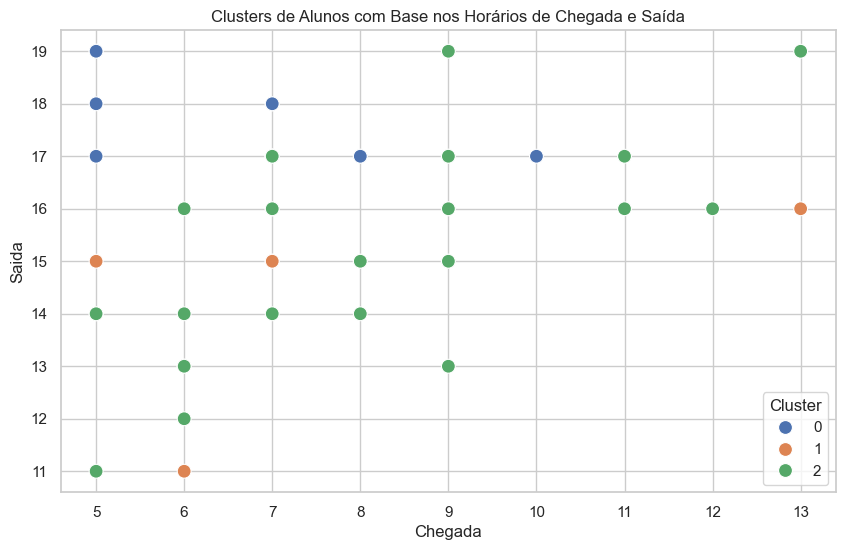

In [9]:
# Cria um gráfico de dispersão para visualizar os clusters.
plt.figure(figsize=(10, 6))  # Define o tamanho da figura.
sns.scatterplot(
    data=df, x="Chegada", y="Saida", hue="Cluster", palette="deep", s=100
)
plt.title("Clusters de Alunos com Base nos Horários de Chegada e Saída")  # Adiciona o título do gráfico.
plt.show()  # Exibe o gráfico.